Import all the libraries you need
- Pandas to compute and processs
- Numpy for numerical computations
- seaborn for plotting as well as matplotlib
- os for the file path (might need it further ig ＼（〇_ｏ）／)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import os
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Naming the file as train and test to read them and then concatenate them to clean them as one file**

In [4]:
df = pd.read_csv('Train.csv')

In [6]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


**Get the info for the columns such as the data type as it is needed for the cleaning process**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [11]:
# Check for duplicates
df.duplicated().sum()

0

**Shape is used here to get the number of columns and the number of rows**

In [14]:
df.shape

(8523, 12)

**Get all the is NaN or is Null values for all the rows so we can know what values have data that needs to be cleaned**

In [17]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**Get the mean of the column 'Item_Weight' as it is a numerical field**

In [20]:
df['Item_Weight'].mean()

12.857645184135976

**Replace all the NaN values with the mean calculated**

In [23]:
df.fillna({'Item_Weight':df['Item_Weight'].mean()} , inplace=True)

In [25]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


**The column  'Item_Weight' is cleaned successfully**

In [28]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [30]:
df['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

**Replace the Nan or the Null values with the mode of the column 'Outlet_Size'**

In [33]:
df.fillna({'Outlet_Size': df['Outlet_Size'].mode()[0]}, inplace=True)

**Finally all the data is cleaned**

In [36]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

**Some values like lf or low fat are the same as Low Fat as well as reg is Regular**

In [39]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [41]:
df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'} , inplace=True)

In [43]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [45]:
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Visualization for some columns (●'◡'●)

In [48]:
sns.set()

<Figure size 1000x500 with 0 Axes>

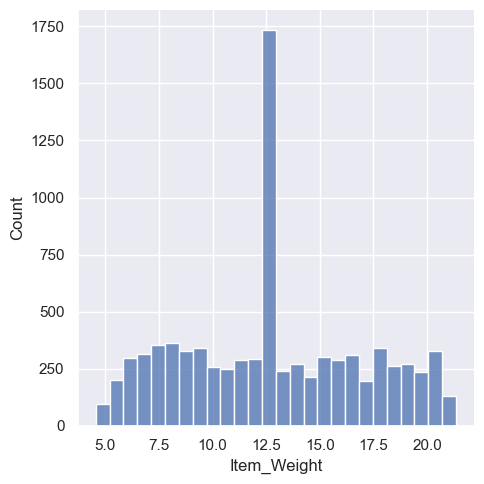

<Figure size 1000x500 with 0 Axes>

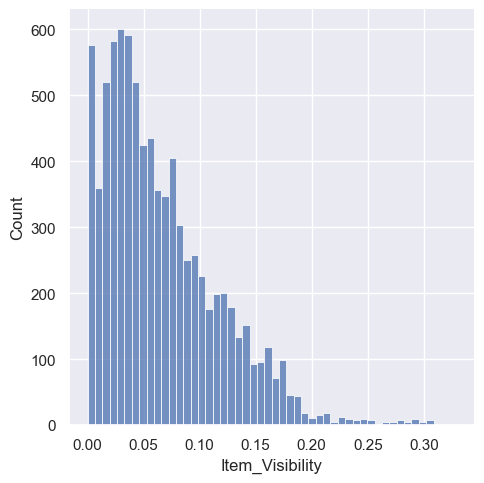

<Figure size 1000x500 with 0 Axes>

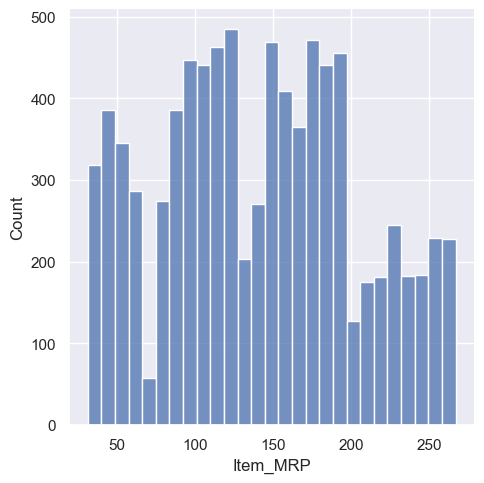

<Figure size 1000x500 with 0 Axes>

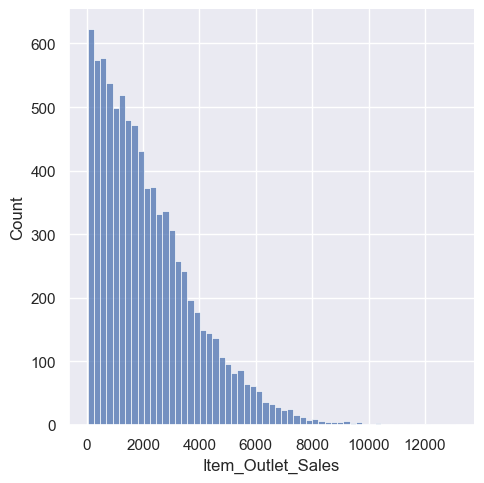

In [50]:
cols=['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']
for col in cols:
    plt.figure(figsize=(10,5))
    sns.displot(df[col])
    plt.show()

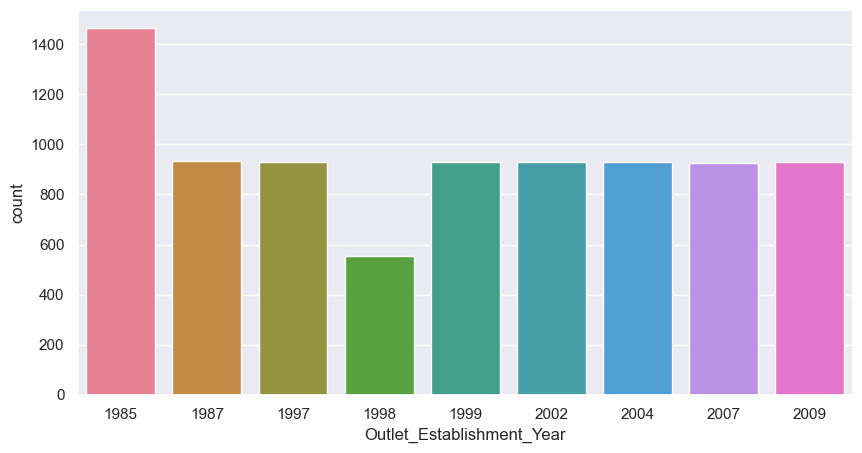

In [51]:
years = df['Outlet_Establishment_Year'].unique()
palette = sns.color_palette("husl", len(years))
plt.figure(figsize=(10, 5))
sns.countplot(
    x='Outlet_Establishment_Year',
    data=df,
    hue='Outlet_Establishment_Year',
    palette=palette,
    dodge=False
)
plt.legend([], [], frameon=False)
plt.show()


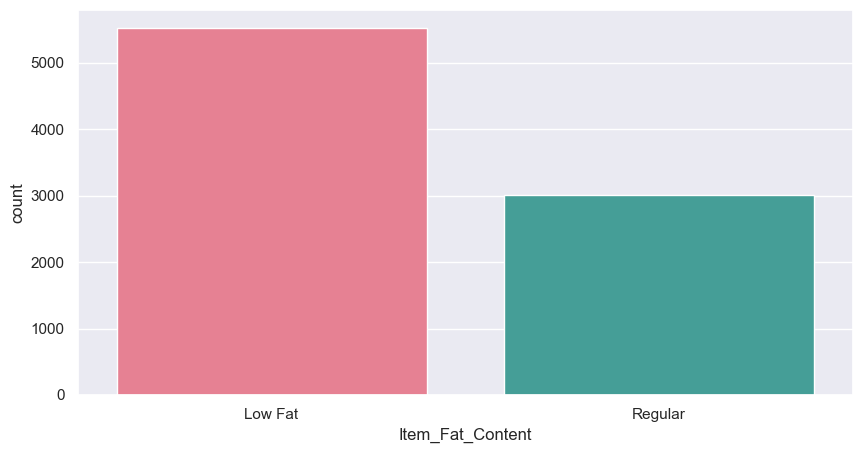

In [52]:
Fat = df['Item_Fat_Content'].unique()
palette = sns.color_palette("husl", len(Fat))
plt.figure(figsize=(10, 5))
sns.countplot(
    x='Item_Fat_Content',
    data=df,
    hue='Item_Fat_Content',
    palette=palette,
    dodge=False
)
plt.legend([], [], frameon=False)
plt.show()


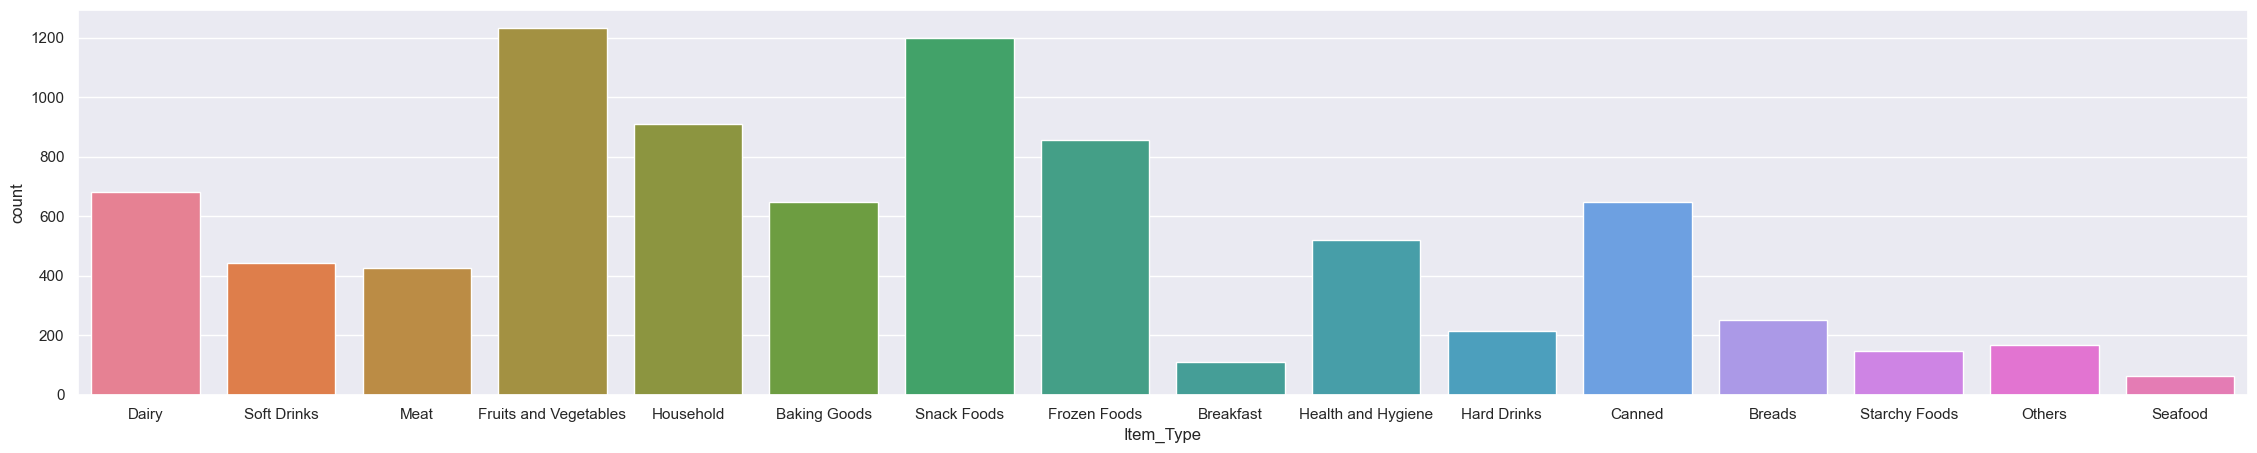

In [53]:
Type = df['Item_Type'].unique()
palette = sns.color_palette("husl", len(Type))
plt.figure(figsize=(28, 5))
sns.countplot(
    x='Item_Type',
    data=df,
    hue='Item_Type',
    palette=palette,
    dodge=False
)
plt.legend([], [], frameon=False)
plt.show()

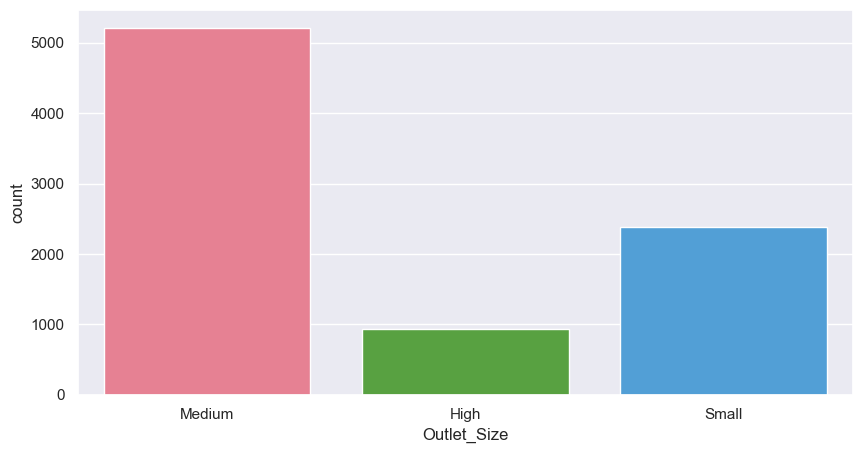

In [58]:
size = df['Outlet_Size'].unique()
palette = sns.color_palette("husl", len(size))
plt.figure(figsize=(10, 5))
sns.countplot(
    x='Outlet_Size',
    data=df,
    hue='Outlet_Size',
    palette=palette,
    dodge=False
)
plt.legend([], [], frameon=False)
plt.show()

In [60]:
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


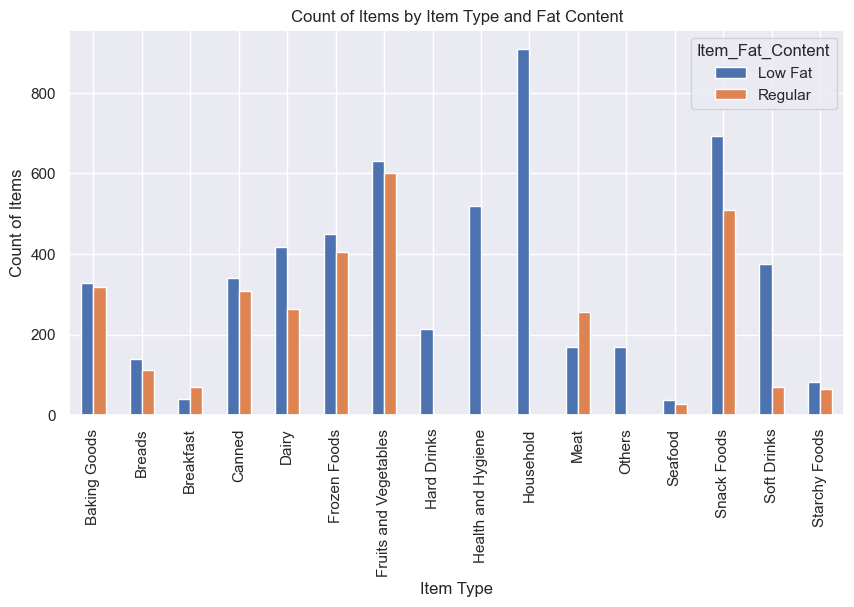

In [146]:
pd.crosstab(df.Item_Type, df.Item_Fat_Content).plot(kind="bar" , figsize=(10, 5) )
plt.xlabel('Item Type')
plt.ylabel('Count of Items')
plt.title('Count of Items by Item Type and Fat Content')
plt.show()


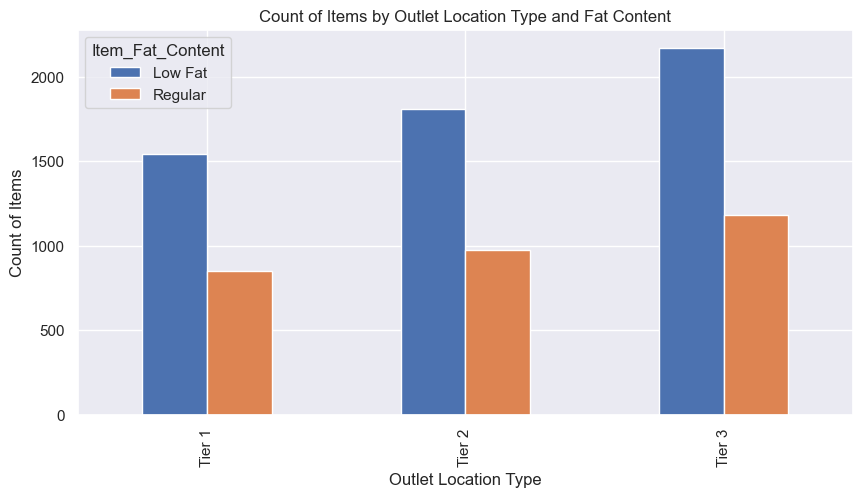

In [144]:
pd.crosstab(df.Outlet_Location_Type, df.Item_Fat_Content).plot(kind="bar" , figsize=(10, 5))
plt.xlabel('Outlet Location Type')
plt.ylabel('Count of Items')
plt.title('Count of Items by Outlet Location Type and Fat Content')

# Display the plot
plt.show()


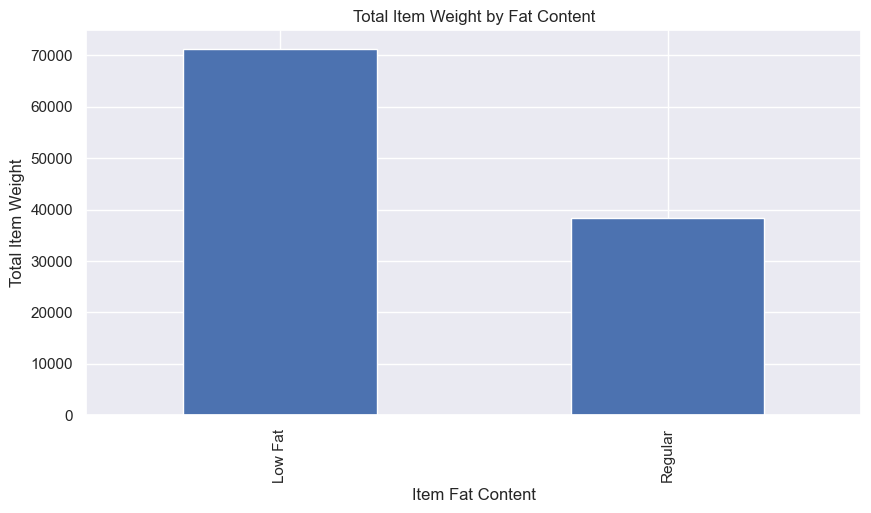

In [150]:
weight_by_fat_content = df.groupby("Item_Fat_Content")["Item_Weight"].sum()
weight_by_fat_content.plot(kind="bar", figsize=(10, 5))

plt.xlabel('Item Fat Content') 
plt.ylabel('Total Item Weight')  
plt.title('Total Item Weight by Fat Content') 
plt.show()


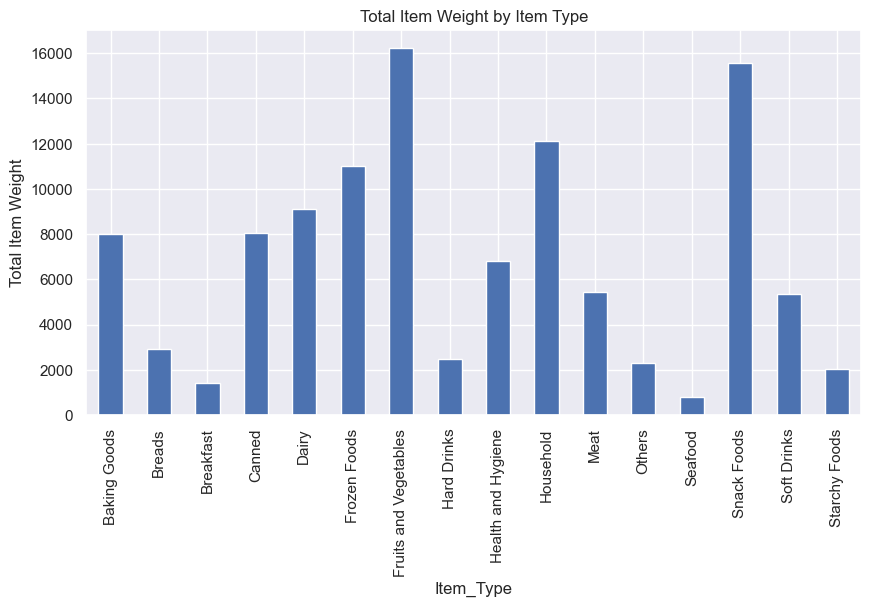

In [152]:
weight_by_Item_Type = df.groupby("Item_Type")["Item_Weight"].sum()
weight_by_Item_Type.plot(kind="bar", figsize=(10, 5))

plt.xlabel('Item_Type') 
plt.ylabel('Total Item Weight')  
plt.title('Total Item Weight by Item Type') 
plt.show()


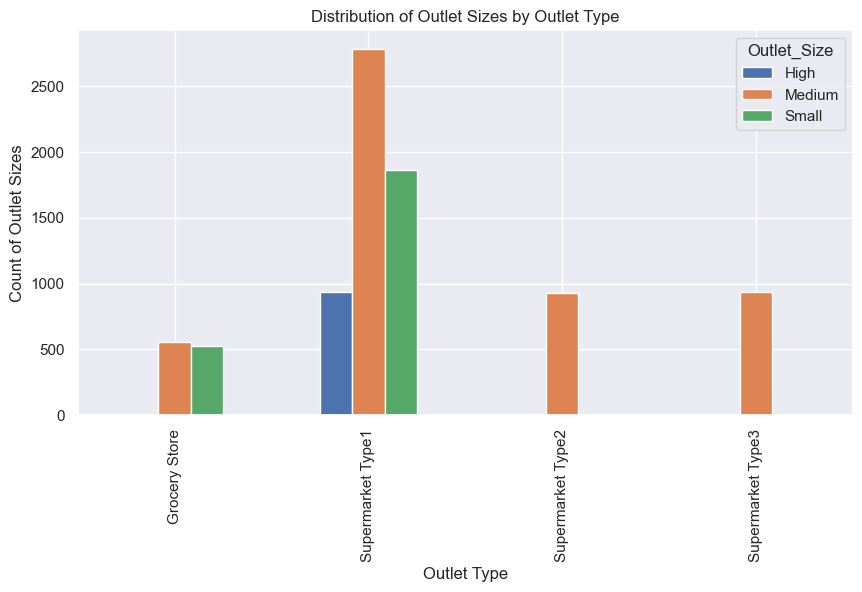

In [158]:
pd.crosstab(df.Outlet_Type, df.Outlet_Size).plot(kind="bar", figsize=(10, 5))
plt.xlabel('Outlet Type')  
plt.ylabel('Count of Outlet Sizes')  
plt.title('Distribution of Outlet Sizes by Outlet Type')  
plt.show()


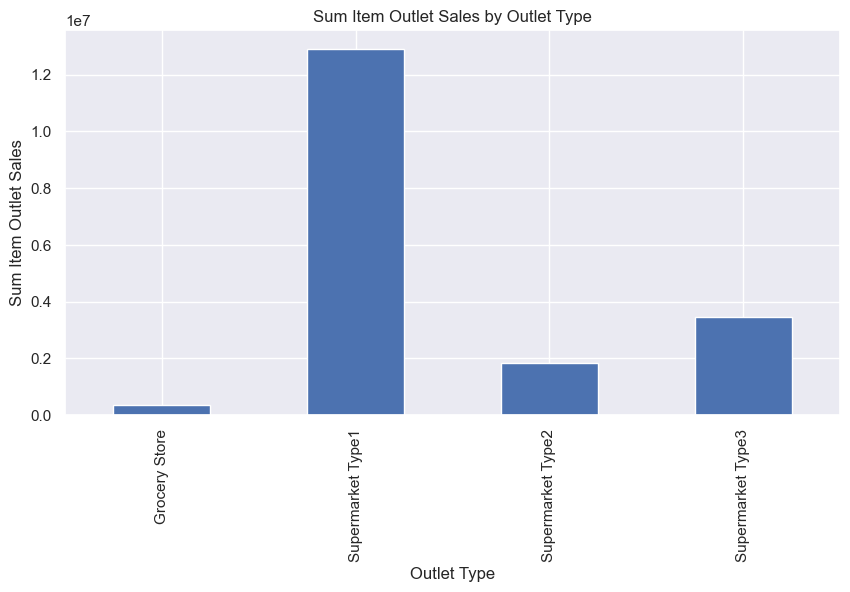

In [160]:
result = df.groupby("Outlet_Type")["Item_Outlet_Sales"].sum()
result.plot(kind="bar", xlabel="Outlet Type", ylabel="Sum Item Outlet Sales", title="Sum Item Outlet Sales by Outlet Type" ,figsize=(10, 5) )
plt.show()

**Normalize the numerical features**

In [65]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

In [67]:
numerical_cols = numerical_cols[numerical_cols != 'Item_Outlet_Sales']
numerical_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')

In [69]:
for col in numerical_cols:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

In [71]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.494352,0.201382,0.465635,0.534661,2181.288914
std,0.251630,0.157123,0.264327,0.348823,1706.499616
min,0.000000,0.000000,0.000000,0.000000,33.290000
25%,0.283120,0.082187,0.265437,0.083333,834.247400
50%,0.494352,0.164228,0.474209,0.583333,1794.331000
75%,0.681453,0.288026,0.655156,0.791667,3101.296400
max,1.000000,1.000000,1.000000,1.000000,13086.964800


**Encode the categorical features**

In [74]:
df_categories = df.select_dtypes(include=['object']).columns
df_categories

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [76]:
encoder = LabelEncoder()
for col in df_categories:
    df[col] = encoder.fit_transform(df[col])

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int32  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int32  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int32  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int32  
 7   Outlet_Establishment_Year  8523 non-null   float64
 8   Outlet_Size                8523 non-null   int32  
 9   Outlet_Location_Type       8523 non-null   int32  
 10  Outlet_Type                8523 non-null   int32  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(5), int32(7)
memory usage: 566.1 KB


In [80]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,0.282525,0,0.048866,4,0.927507,9,0.583333,1,0,1,3735.1380
1,8,0.081274,1,0.058705,14,0.072068,3,1.000000,1,2,2,443.4228
2,662,0.770765,0,0.051037,10,0.468288,9,0.583333,1,0,1,2097.2700
3,1121,0.871986,1,0.000000,6,0.640093,0,0.541667,1,2,0,732.3800
4,1297,0.260494,0,0.000000,9,0.095805,1,0.083333,0,2,1,994.7052


In [82]:
df.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,0.494352,0.352693,0.201382,7.226681,0.465635,4.722281,0.534661,1.170832,1.112871,1.201220,2181.288914
std,449.222377,0.251630,0.477836,0.157123,4.209990,0.264327,2.837201,0.348823,0.600327,0.812757,0.796459,1706.499616
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.290000
25%,395.500000,0.283120,0.000000,0.082187,4.000000,0.265437,2.000000,0.083333,1.000000,0.000000,1.000000,834.247400
50%,783.000000,0.494352,0.000000,0.164228,6.000000,0.474209,5.000000,0.583333,1.000000,1.000000,1.000000,1794.331000
75%,1167.000000,0.681453,1.000000,0.288026,10.000000,0.655156,7.000000,0.791667,2.000000,2.000000,1.000000,3101.296400
max,1558.000000,1.000000,1.000000,1.000000,15.000000,1.000000,9.000000,1.000000,2.000000,2.000000,3.000000,13086.964800


**Feature Scaling (Standardization)**

In [85]:
X = df.drop('Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']

In [87]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Spliting the data**

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [92]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6818, 11), (1705, 11), (6818,), (1705,))

### Linear regression Model

In [95]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

**Model Evaluation**


In [98]:
predictions = lr.predict(X_test)

In [100]:
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

In [102]:
print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

R-squared: 0.5246461805160536
Mean Squared Error: 1291997.4524092951
Root Mean Squared Error: 1136.660658424182


### The k-nearest neighbors (KNN)

**Hyperparameter Tuning (Try different n_neighbors)**

In [106]:
best_score = -float('inf')
best_k = 0

for k in range(1, 21):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    if r2 > best_score:
        best_score = r2
        best_k = k

In [107]:
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=19)

**Model Evaluation**

In [109]:
y_pred = knn.predict(X_test)

In [110]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [111]:
print(f"Optimal k (Number of Neighbors): {best_k}")
print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Optimal k (Number of Neighbors): 19
R-squared: 0.5795660597537311
Mean Squared Error: 1142726.8645790827
Root Mean Squared Error: 1068.9840338279532


**THE Comparison Linear regression VS Knn**

In [113]:
#
data = {
    "Metric": ["R-squared", "Mean Squared Error", "Root Mean Squared Error"],
    "Linear Regression": [0.5246, 1291997.45, 1136.66],
    "KNN (Best k = 19)": [0.5796, 1142726.86, 1068.98],
    "Best Model": ["", "", "KNN"]
}

df_comparison = pd.DataFrame(data)

df_comparison

# Explanation:
# R-squared: KNN (0.5796) is better than Linear Regression (0.5246), meaning KNN explains more variance in the data.
# MSE: KNN has a lower Mean Squared Error (1,142,726.86 vs 1,291,997.45), indicating better fit.
# RMSE: KNN also outperforms Linear Regression with a lower Root Mean Squared Error (1,068.98 vs 1,136.66).
# Hence, KNN is generally the better model for this dataset.

,Metric,Linear Regression,KNN (Best k = 19),Best Model
0,R-squared,5.246000e-01,5.796000e-01,
1,Mean Squared Error,1.291997e+06,1.142727e+06,
2,Root Mean Squared Error,1.136660e+03,1.068980e+03,KNN
